Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


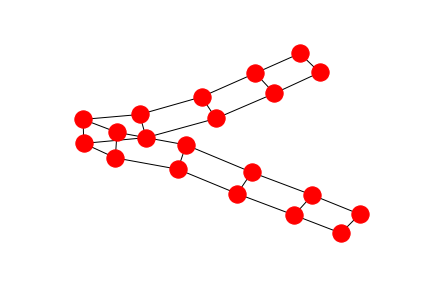

In [38]:
%matplotlib inline
from networkx.drawing.nx_pydot import write_dot
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import widgets 
import networkx as nx
##Program to store and display coordinates of a mouse click
%pylab notebook

G=nx.ladder_graph(10)                        # Genereates the graph G using NetworkX
pos=nx.spring_layout(G)                      # NetworkX realize graphs diffently each time. The pos captures the position given
                                             # with this special layout
    
nx.set_node_attributes(G,pos, 'pos')         # This method creates a kind of node dictionary, where the given a node, one can 
                                             # look up its position

fig, ax = plt.subplots()                     # I don't understand this part yet, but it is needed somehow. The ax is short for 
                                             # axis and these are frequently mentioned in matplotlib tutorials.

##nx.draw(G, with_labels=True, font_weight='bold')
nx.draw(G, pos = pos )                       # Draws the graph with the positions already predetermined. Will explore nx.draw
                                             # in pyplot_select_nodes_by_ellipse
##ax.plot()

clicks = []                        # This is the list of the relevant coordinates for this example
clicks2 = []                       # These are also coordinates, but not the correct ones

coordinates = ("","")

def onclick(event):                          # The onclick definition needs to be placed above the "cid = fig.c..."-line for the first compilation of the notebook. 
    clicks.append([event.xdata, event.ydata])
    clicks2.append([event.x,event.y])
    #print(event.x)                          # If this were uncommented, it should in theory print out text. It doesn't
    #coordinates = (event.x, event.y)        # 
    #return coordinates                      # There are no obvious ways about returning the coordinates here, unless this were
                                             # to be set as a global variable, which is bad according to someone on the internet
    

cid = fig.canvas.mpl_connect('button_press_event', onclick) # The cid is short for call id, and is not the return value for
                                                            # the onclick function. 


In [35]:
def d(point1, point2):
    (x1,y1) = point1
    (x2,y2) = point2
    distance = ((x1-x2)**2 + (y1-y2)**2)**(1/2)
    return distance

def nearest(nodes, length, click):
    minInd = 0
    for i in range(0,length):
        if( d(nodes[minInd]['pos'],click) > d(nodes[i]['pos'],click) ):
            minInd = i
    return minInd

if len(clicks) != 0:
    lastClick = clicks.pop()
    lastClick2 = clicks2.pop()
    length = G.number_of_nodes()
    indeksNearest = nearest(G.nodes(), length ,lastClick)
    nearestNode = G.nodes[indeksNearest]
    print("This is the indeks of the nearest node to where you clicked:    " + str(indeksNearest))
    print("This is the position of the nearest node to where you clicked:    " + str(nearestNode['pos']))
    print("This is the position on the screen that you clicked:    " + str(lastClick) + "\n")
    print("Matplotlib seems to operate on two different sets of coordinates (or something, I havent really looked into it yet) therefore:")
    print("This is also the position on the screen you clicked:    " + str(lastClick2))
    print("NetworkX does not seem to use these coordinates when it plots points")

print("There are " + str(len(clicks)) + " clicks left to display information about")


There are 0 clicks left to display information about
